In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4574352.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134579.51it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:04<00:00, 332167.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7849414.41it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trainset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
image, label = trainset[10]

classes = trainset.classes

print(image.shape)
print(image.dtype)
print(classes[label])

torch.Size([1, 28, 28])
torch.float32
3 - three


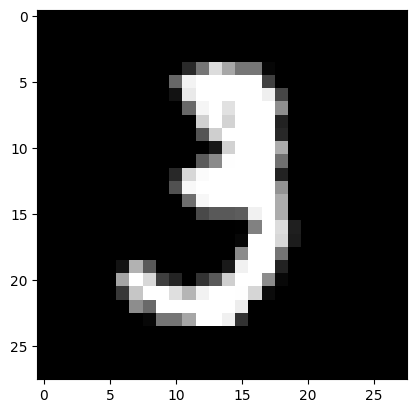

In [ ]:
plt.imshow(image.reshape(28,28), cmap = "gray")
plt.show()

In [ ]:
# https://paperswithcode.com/method/lenet
# https://github.com/Elman295/Paper_with_code/blob/main/LeNet_5_Pytorch.ipynb
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = LeNet().to(device)
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
)


In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

[Epoch 1, Batch 100] loss: 2.263
[Epoch 1, Batch 200] loss: 0.917
[Epoch 1, Batch 300] loss: 0.269
[Epoch 1, Batch 400] loss: 0.191
[Epoch 1, Batch 500] loss: 0.160
[Epoch 1, Batch 600] loss: 0.130
[Epoch 1, Batch 700] loss: 0.119
[Epoch 1, Batch 800] loss: 0.111
[Epoch 1, Batch 900] loss: 0.105
[Epoch 2, Batch 100] loss: 0.088
[Epoch 2, Batch 200] loss: 0.076
[Epoch 2, Batch 300] loss: 0.083
[Epoch 2, Batch 400] loss: 0.084
[Epoch 2, Batch 500] loss: 0.082
[Epoch 2, Batch 600] loss: 0.075
[Epoch 2, Batch 700] loss: 0.067
[Epoch 2, Batch 800] loss: 0.063
[Epoch 2, Batch 900] loss: 0.063
[Epoch 3, Batch 100] loss: 0.055
[Epoch 3, Batch 200] loss: 0.061
[Epoch 3, Batch 300] loss: 0.047
[Epoch 3, Batch 400] loss: 0.047
[Epoch 3, Batch 500] loss: 0.053
[Epoch 3, Batch 600] loss: 0.051
[Epoch 3, Batch 700] loss: 0.050
[Epoch 3, Batch 800] loss: 0.060
[Epoch 3, Batch 900] loss: 0.048
[Epoch 4, Batch 100] loss: 0.046
[Epoch 4, Batch 200] loss: 0.036
[Epoch 4, Batch 300] loss: 0.037
[Epoch 4, 

In [ ]:
correct = 0
total = 0
incorrect = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

Accuracy of the network on the 10000 test images: 98.85%


tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False], device='cuda:0')